## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Uploading the dataset and displaying it

In [2]:
data = pd.read_csv("/content/ds_salaries.csv")

In [4]:
data.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
# Unnamed: 0
# Likely an index or duplicate index column
# work_year
# The year the salary was paid
# experience_level
# Experience level in the job (e.g., Entry, Mid, Senior)
# employment_type
# Type of employment (e.g., Full-time, Part-time)
# job_title
# Title of the job
# salary
# Salary amount
# salary_currency
# Currency the salary is paid in
# salary_in_usd
# Salary converted to USD
# employee_residence
# Country of residence of the employee
# remote_ratio
# Degree of work remoteness (0 = none, 50 = partially, 100 = fully remote)
# company_location
# Location of the company
# company_size
# Size of the company (S = Small, M = Medium, L = Large)

In [5]:
data.shape

(607, 12)

In [6]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [7]:
# Printing information on the dataset
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns\n')
print('- -' * 30)
print('Value counts for each columns: \n')
for i in data.columns:
    print(f'===== {i} =====\n')
    print(data[i].value_counts().sort_values(ascending=False))
    print('- -' * 30)

The dataset has 607 rows and 12 columns

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Value counts for each columns: 

===== Unnamed: 0 =====

Unnamed: 0
15     1
606    1
0      1
1      1
2      1
      ..
586    1
587    1
588    1
589    1
590    1
Name: count, Length: 607, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
===== work_year =====

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
===== experience_level =====

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
===== employment_type =====

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

## Checking for the null values

In [8]:
data.isnull().sum()

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [10]:
data.dtypes

,0
Unnamed: 0,int64
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64


In [11]:
data['work_year'].value_counts()

,count
work_year,
2022,318
2021,217
2020,72


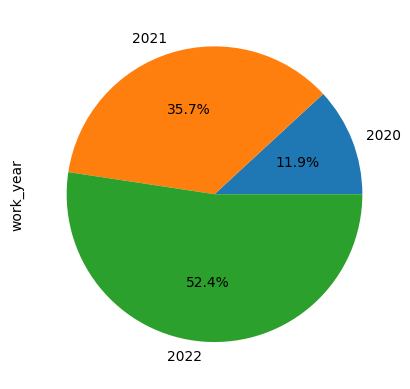

In [12]:
data.groupby('work_year')['work_year'].count().plot.pie(autopct="%1.1f%%");

In [14]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
data.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [17]:
cat_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency',
            'employee_residence', 'company_location', 'company_size']
for col in cat_cols:
    data[col] = data[col].astype('category')

In [18]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [19]:
data[cat_cols].describe()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


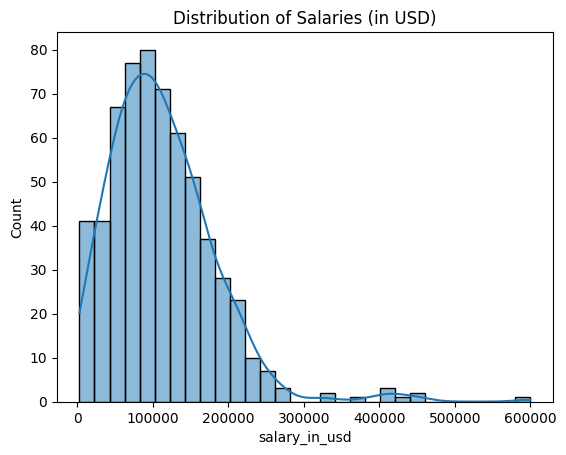

In [20]:
#Salary in USD distribution:
sns.histplot(data['salary_in_usd'], bins=30, kde=True)
plt.title("Distribution of Salaries (in USD)")
plt.show()

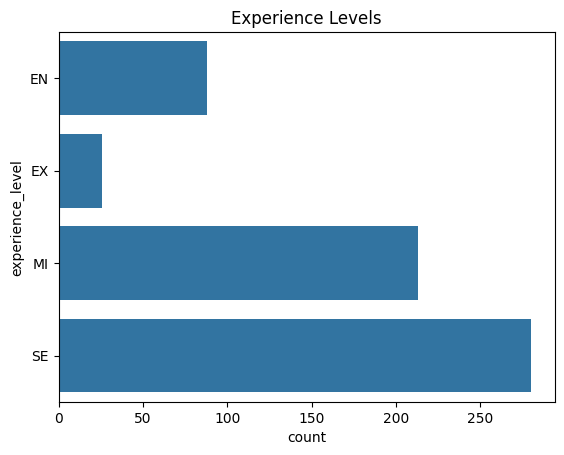

In [22]:
#Experience Level Count:
sns.countplot(data=data, y='experience_level')
plt.title("Experience Levels")
plt.show()

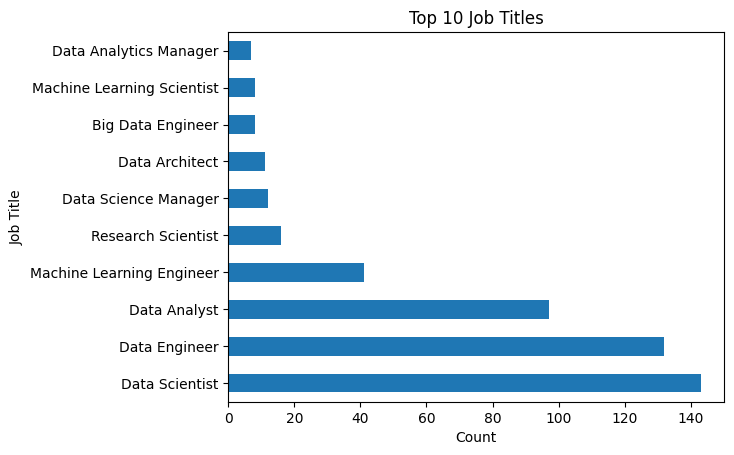

In [24]:
#Top Job Titles:
data['job_title'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

In [26]:
# Geographical Insights
# Employee Residence vs Company Location:
pd.crosstab(data['employee_residence'], data['company_location'])

company_location,AE,AS,AT,AU,BE,BR,CA,CH,CL,CN,...,PL,PT,RO,RU,SG,SI,TR,UA,US,VN
employee_residence,,,,,,,,,,,,,,,,,,,,,
AE,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AU,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BE,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
BO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
BR,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
CA,0,0,0,0,0,0,28,0,0,0,...,0,0,0,0,0,0,0,0,1,0


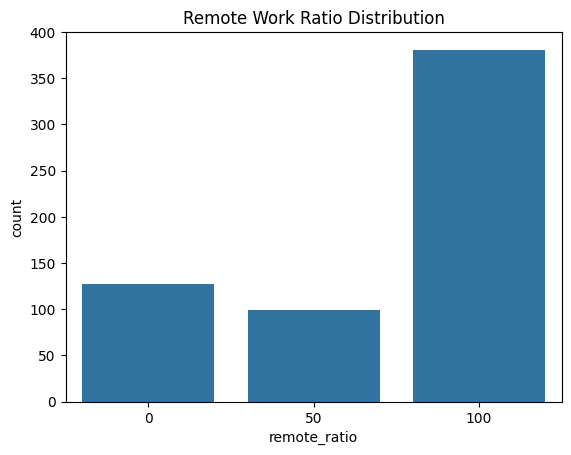

In [28]:
# Remote Work Ratio:
sns.countplot(data=data, x='remote_ratio')
plt.title("Remote Work Ratio Distribution")
plt.show()

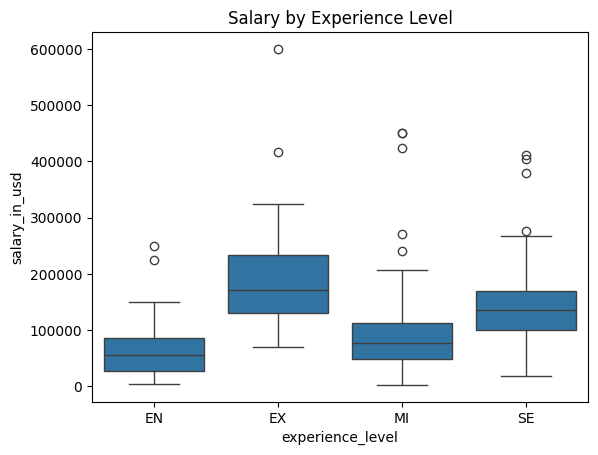

In [29]:
#  Salary Trends
# Salary by Experience Level:
sns.boxplot(data=data, x='experience_level', y='salary_in_usd')
plt.title("Salary by Experience Level")
plt.show()

<ipython-input-31-189573220>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='company_size', y='salary_in_usd', ci=None)


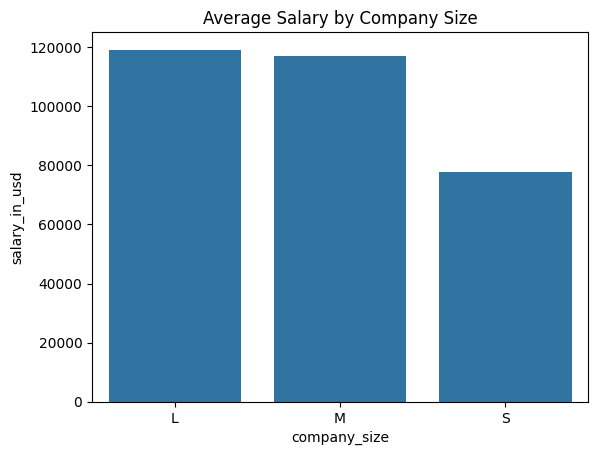

In [31]:
# Salary by Company Size:
sns.barplot(data=data, x='company_size', y='salary_in_usd', ci=None)
plt.title("Average Salary by Company Size")
plt.show()

<ipython-input-32-2415376606>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_jobs = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


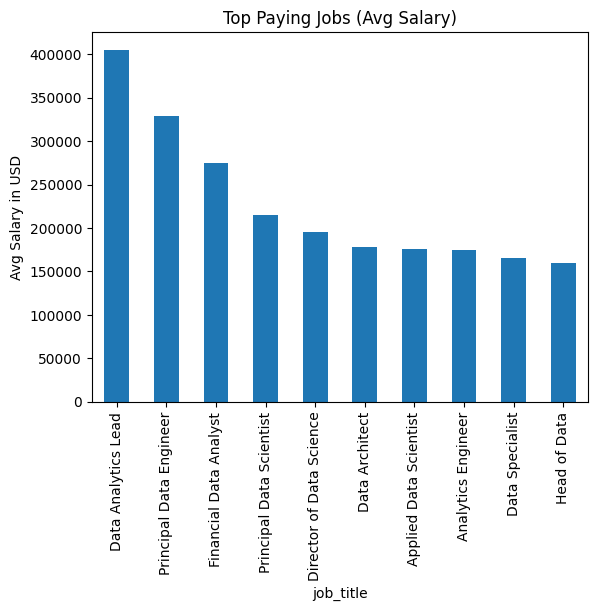

In [32]:
#Salary by Job Title (Top 10):
top_jobs = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_jobs.plot(kind='bar')
plt.title("Top Paying Jobs (Avg Salary)")
plt.ylabel("Avg Salary in USD")
plt.show()

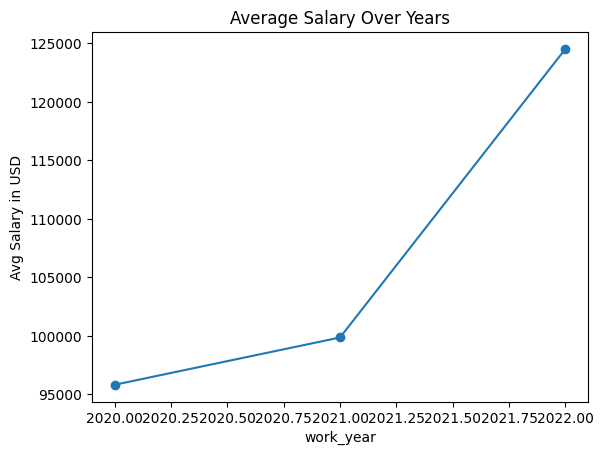

In [33]:
data.groupby('work_year')['salary_in_usd'].mean().plot(kind='line', marker='o')
plt.title("Average Salary Over Years")
plt.ylabel("Avg Salary in USD")
plt.show()

<ipython-input-34-8114929>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='remote_ratio', y='salary_in_usd', palette='Set2')


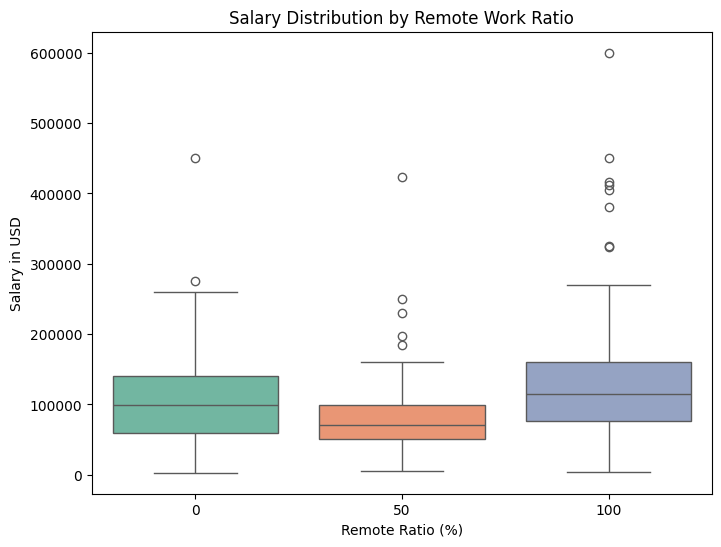

In [34]:
# Remote Work Impact on Salary
# Boxplot: Salary vs Remote Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='remote_ratio', y='salary_in_usd', palette='Set2')
plt.title("Salary Distribution by Remote Work Ratio")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary in USD")
plt.show()

<ipython-input-36-1210727627>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_residence = data.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


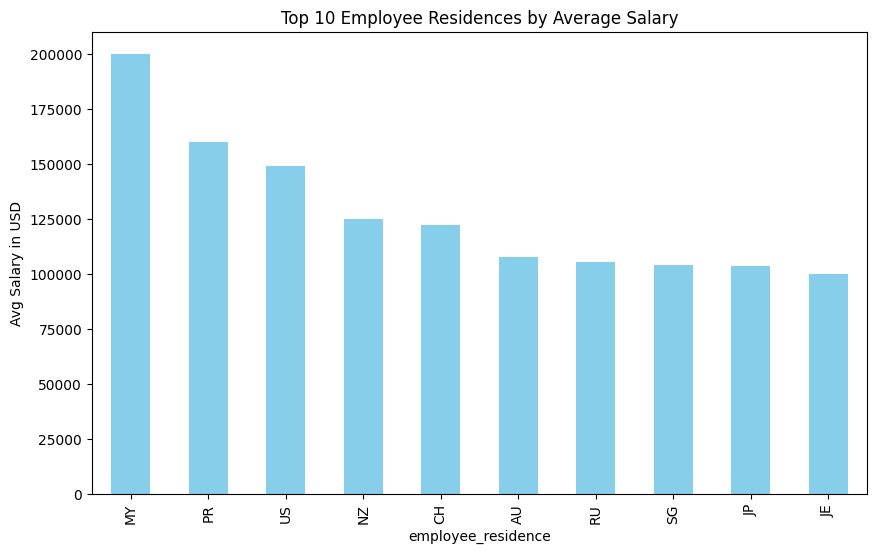

<ipython-input-36-1210727627>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_company = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


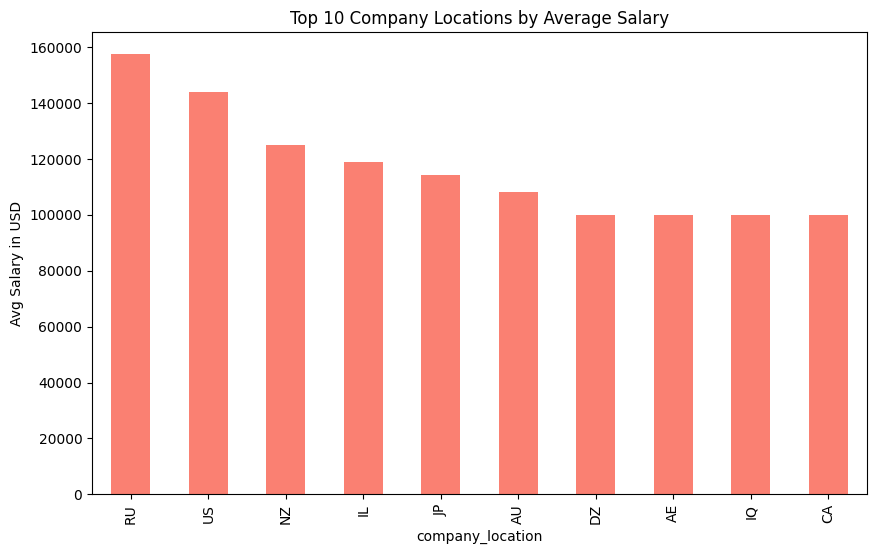

In [36]:
#Which countries pay the highest salaries?
# Top 10 Employee Residences by Avg Salary
top_residence = data.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_residence.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Top 10 Employee Residences by Average Salary")
plt.ylabel("Avg Salary in USD")
plt.show()

# Top 10 Company Locations by Avg Salary
top_company = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_company.plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title("Top 10 Company Locations by Average Salary")
plt.ylabel("Avg Salary in USD")
plt.show()

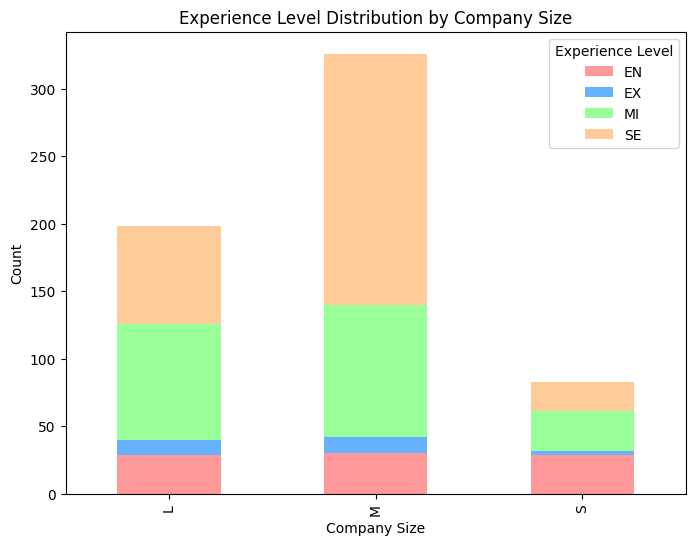

In [37]:
#Do larger companies hire more senior roles?
# Stacked Bar Chart: Experience Level by Company Size
ct = pd.crosstab(data['company_size'], data['experience_level'])
ct.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#FF9999','#66B2FF','#99FF99','#FFCC99'])
plt.title("Experience Level Distribution by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.legend(title="Experience Level")
plt.show()

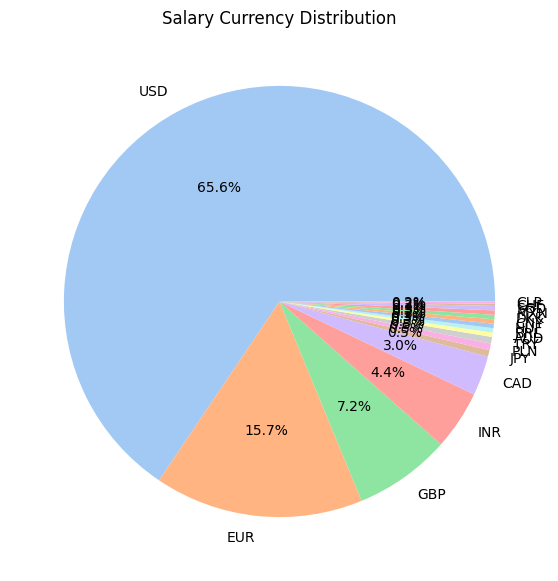

In [38]:
# Which currencies are most commonly used for salaries?
# Pie Chart: Salary Currency Distribution
currency_counts = data['salary_currency'].value_counts()
plt.figure(figsize=(7, 7))
currency_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Salary Currency Distribution")
plt.ylabel("")
plt.show()

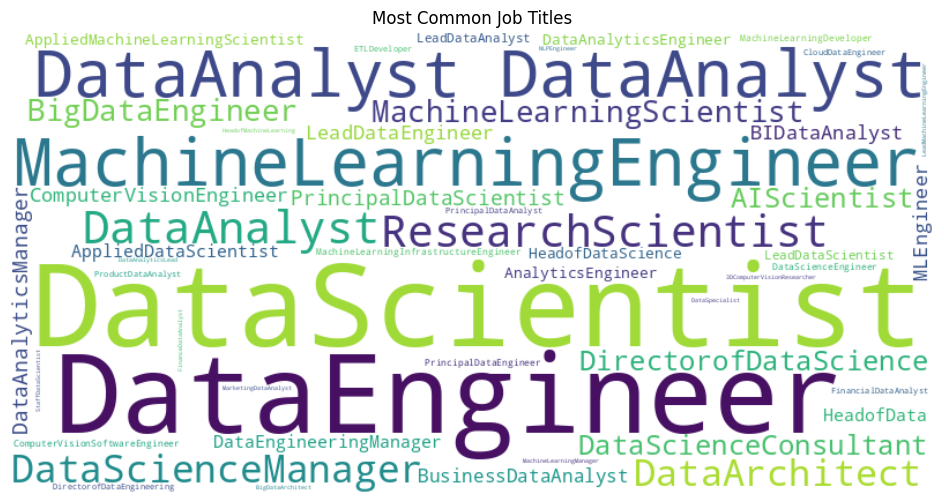

In [39]:
#What are the most common job titles?
from wordcloud import WordCloud

# Word Cloud: Job Titles
job_titles = ' '.join(data['job_title'].str.replace(" ", ""))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Job Titles")
plt.show()

<ipython-input-40-1546340609>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(index='employee_residence', columns='company_location', values='salary_in_usd', aggfunc='mean')


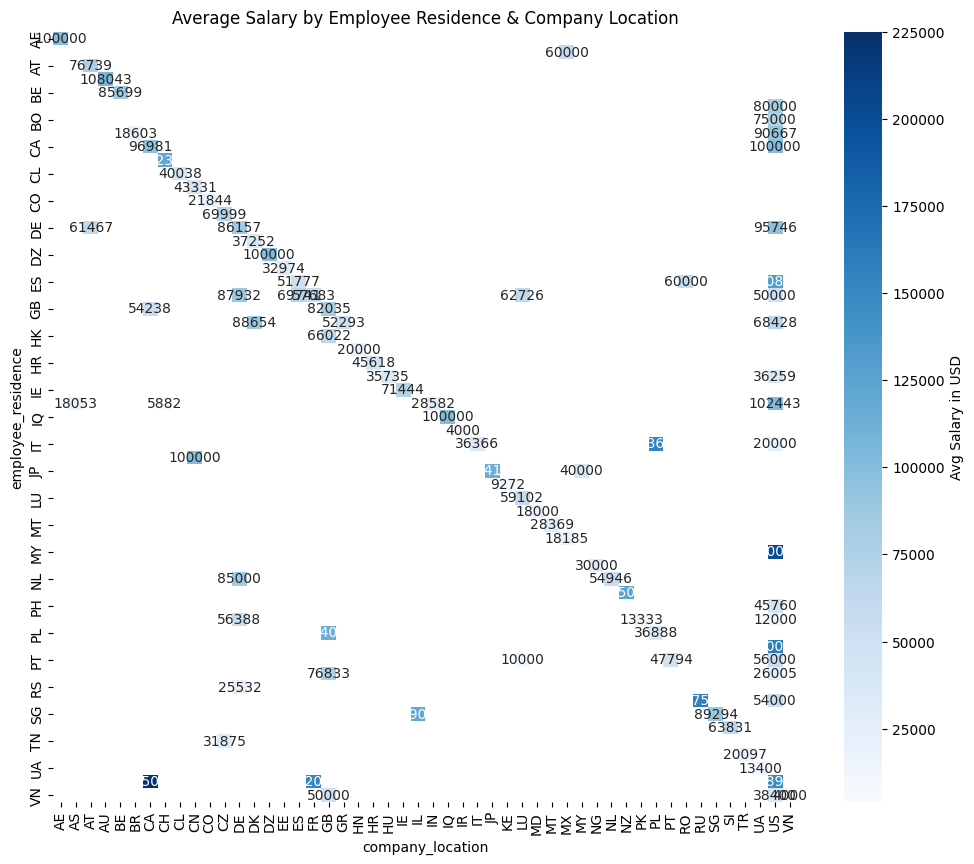

In [40]:
#Salary vs Company Location
#How do salaries vary by employee residence and company location?
# Cross-tabulation heatmap: Avg Salary by Residence & Company Location
heatmap_data = data.pivot_table(index='employee_residence', columns='company_location', values='salary_in_usd', aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Blues', cbar_kws={'label': 'Avg Salary in USD'})
plt.title("Average Salary by Employee Residence & Company Location")
plt.show()

<ipython-input-41-2242454786>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  remote_exp = data.groupby('experience_level')['remote_ratio'].value_counts(normalize=True).unstack()


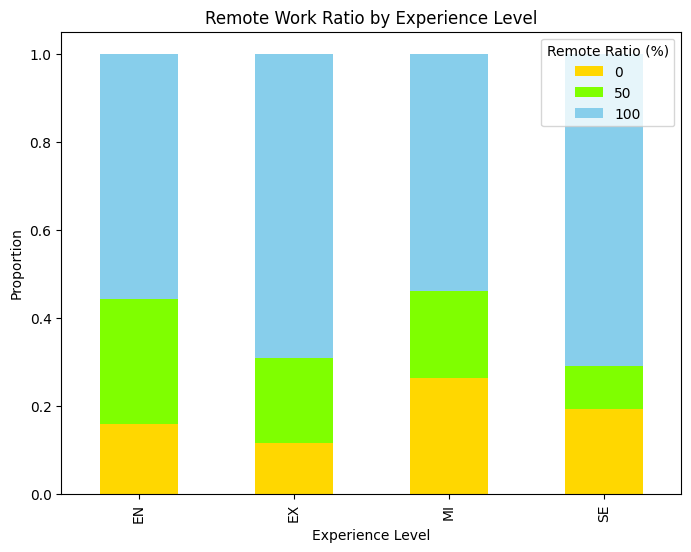

In [41]:
#Experience Level vs Remote Work
# Grouped Bar Chart: Remote Ratio by Experience Level
remote_exp = data.groupby('experience_level')['remote_ratio'].value_counts(normalize=True).unstack()
remote_exp.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#FFD700', '#7FFF00', '#87CEEB'])
plt.title("Remote Work Ratio by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Proportion")
plt.legend(title="Remote Ratio (%)")
plt.show()

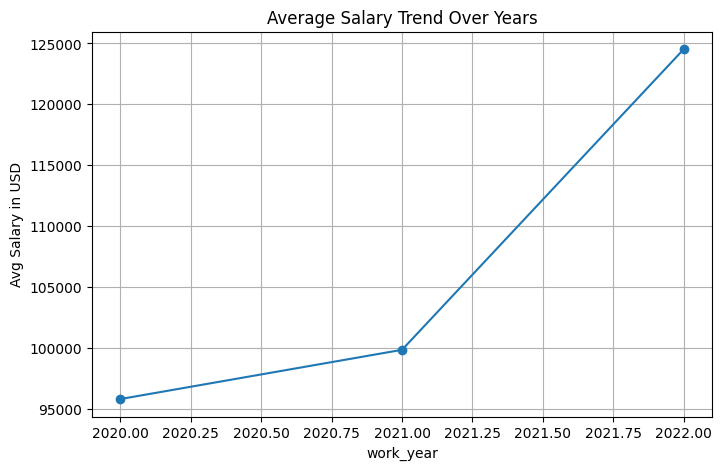

In [42]:
#Salary Trends Over Time
# Line Plot: Avg Salary Over Years
data.groupby('work_year')['salary_in_usd'].mean().plot(kind='line', marker='o', figsize=(8, 5))
plt.title("Average Salary Trend Over Years")
plt.ylabel("Avg Salary in USD")
plt.grid(True)
plt.show()